In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
import os

### Poll data

In [2]:
#pool_data = pd.read_csv('dane_years/pools_edited.csv', index_col=0)
pool_data_middle = pd.read_csv('dane_years/pools_data/percent_votes.csv', index_col=0).iloc[:,:-1]
pool_data_middle = pool_data_middle.divide(pool_data_middle.sum(1),0)

### Voting data

In [3]:
path = 'wyniki_wyborow/Simple/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()

In [4]:
files

['2001_WS.csv',
 '2005_WS.csv',
 '2007_WS.csv',
 '2011_WS.csv',
 '2015_WS.csv',
 '2019_WS.csv']

In [5]:
vote_list = [(lambda x: pd.read_csv(path+x,index_col=0, header=0))(f) for f in files[:]]
vote_list[0] = vote_list[0].iloc[1:,:]

In [6]:
vote_list[0]['jednostka'] = [j.upper() for j in vote_list[0]['jednostka']]
vote_list[0] = vote_list[0].sort_values(['jednostka'])
vote_list[0].columns = ['województwo'] + vote_list[0].columns.values.tolist()[1:] 

In [7]:
vote_list[0] = vote_list[0].set_index('województwo')

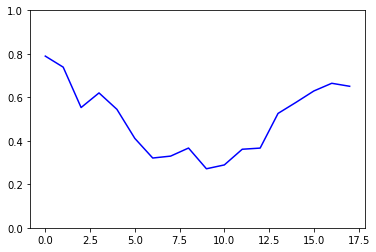

In [8]:
plt.plot(pool_data_middle['Blue'].values[1:],'b')
plt.ylim(0,1)
plt.show()

In [9]:
w = pd.read_csv('dane_years/voters/percent_voters.csv', header=None)[1].values
w.shape

(16,)

### Computation files

In [10]:
files = listdir('model/model1')
files.sort()

In [11]:
files

['all_at_once.txt',
 'all_at_onceII.txt',
 'each_year_no_time.txt',
 'each_year_no_timeII.txt',
 'output_input_each_epoch.txt',
 'output_input_each_epochII.txt',
 'output_input_each_epoch_lin_w.txt',
 'output_input_each_epoch_lin_wII.txt',
 'output_input_each_step.txt',
 'output_input_each_stepII.txt',
 'output_input_each_step_lin_w.txt',
 'output_input_each_step_lin_wII.txt']

In [12]:
out_arr = np.zeros((len(files),100, 101, 18))
for i in range(len(files)):
    output = []
    with open('model/model1/'+files[i], "r") as f:
        for fline in f.read().split('\n')[:-1]:
            fline = fline[3:].replace('[','').split(']')
            tmp_output = []
            for fl in fline:
                if(len(fl)>1):
                    tmptmp_out = []
                    for fi in fl.split(' '):
                        if(len(fi)>1): 
                            try:
                                tmptmp_out.append(float(fi))
                            except: print(fi)
                    tmp_output.append(tmptmp_out)
            output.append(tmp_output)
        np.array(output)
    out_arr[i]= np.array(output)

In [13]:
out_arr.shape

(12, 100, 101, 18)

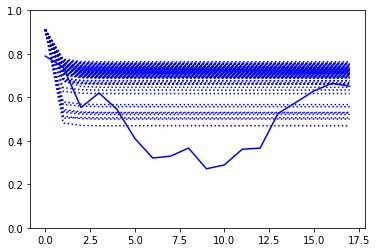

In [14]:
plt.plot(out_arr[9,:,-1,:].T, 'b:')
plt.plot(pool_data_middle['Blue'].values[1:],'b')
plt.ylim(0,1)
plt.show()

In [30]:
out_arr.shape

(12, 100, 101, 18)

In [51]:
np.mean(pl_arr,0).shape

(18,)

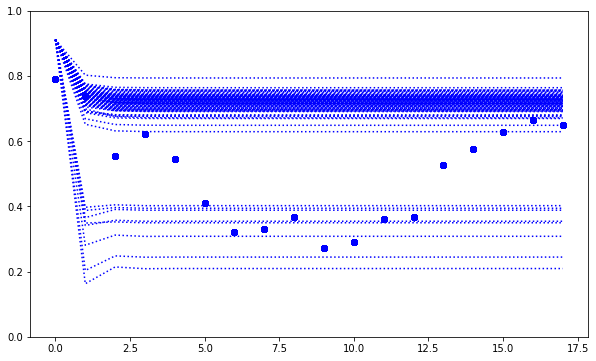

In [113]:
fig = plt.figure(figsize=(10,6))
pl_arr = out_arr[10,0,:,:]
pl_arr = pl_arr[pl_arr>0].reshape(-1,18)
for i in range(100):
    pl_arr = out_arr[7,i,-1,:]
    pl_arr = pl_arr[pl_arr>0].reshape(-1,18)
    if pl_arr.shape[0]>0:
        plt.plot(pl_arr.T, 'b:')
        plt.plot(pool_data_middle['Blue'].values[1:],'bo')
        #plt.text(18+i*0.2, pl_arr.T.min(), str(i))
plt.ylim(0,1)
plt.show()